In [68]:
from __future__ import print_function
import random
import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,AlphaDropout,Dropout,BatchNormalization
from keras.optimizers import adam, SGD
from keras.callbacks import LearningRateScheduler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score,train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [5]:
data_root = 'data'
german_data = os.path.join(data_root,'GermanCreditInput.xls')
german_label = os.path.join(data_root,'GermanCreditOutputClass1columnknn.xls')
australian_dataset = os.path.join(data_root,'australian dataset.xlsx')

In [6]:
nn_config = {
    'train_cycles':600,
}

In [7]:
x_data = np.array(pd.read_excel(german_data,header=None))
y_data = np.array(pd.read_excel(german_label,header=None))
print('Dataset Shape : {}\nDataset Labels Shape : {}'.format(x_data.shape,y_data.shape))

Dataset Shape : (1000, 30)
Dataset Labels Shape : (1000, 1)


In [8]:
mx = MinMaxScaler()
mx.fit(x_data)
p_x_data = mx.transform(x_data)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(p_x_data,y_data,test_size=.1)

In [17]:
model = Sequential()
model.add(Dense(1, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbo)

Train on 900 samples, validate on 100 samples
Epoch 1/2000
900/900 [==============================] - 0s 473us/step - loss: 0.7967 - acc: 0.3322 - val_loss: 0.7505 - val_acc: 0.3700
Epoch 2/2000
900/900 [==============================] - 0s 110us/step - loss: 0.7484 - acc: 0.3956 - val_loss: 0.7245 - val_acc: 0.4700
Epoch 3/2000
900/900 [==============================] - 0s 105us/step - loss: 0.7122 - acc: 0.4756 - val_loss: 0.7040 - val_acc: 0.5200
Epoch 4/2000
900/900 [==============================] - 0s 121us/step - loss: 0.6834 - acc: 0.5667 - val_loss: 0.6901 - val_acc: 0.5700
Epoch 5/2000
900/900 [==============================] - 0s 112us/step - loss: 0.6624 - acc: 0.6222 - val_loss: 0.6799 - val_acc: 0.6000
Epoch 6/2000
900/900 [==============================] - 0s 111us/step - loss: 0.6461 - acc: 0.6589 - val_loss: 0.6740 - val_acc: 0.5900
Epoch 7/2000
900/900 [==============================] - 0s 114us/step - loss: 0.6338 - acc: 0.6711 - val_loss: 0.6700 - val_acc: 0.6100
Ep

900/900 [==============================] - 0s 113us/step - loss: 0.4885 - acc: 0.7689 - val_loss: 0.5535 - val_acc: 0.7100
Epoch 61/2000
900/900 [==============================] - 0s 118us/step - loss: 0.4868 - acc: 0.7689 - val_loss: 0.5532 - val_acc: 0.7000
Epoch 62/2000
900/900 [==============================] - 0s 122us/step - loss: 0.4849 - acc: 0.7722 - val_loss: 0.5501 - val_acc: 0.7100
Epoch 63/2000
900/900 [==============================] - 0s 113us/step - loss: 0.4832 - acc: 0.7800 - val_loss: 0.5480 - val_acc: 0.7200
Epoch 64/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4817 - acc: 0.7833 - val_loss: 0.5476 - val_acc: 0.7200
Epoch 65/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4804 - acc: 0.7822 - val_loss: 0.5489 - val_acc: 0.7200
Epoch 66/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4785 - acc: 0.7811 - val_loss: 0.5474 - val_acc: 0.7300
Epoch 67/2000
900/900 [==============================] 

Epoch 120/2000
900/900 [==============================] - 0s 102us/step - loss: 0.4554 - acc: 0.7889 - val_loss: 0.5396 - val_acc: 0.7400
Epoch 121/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4557 - acc: 0.7878 - val_loss: 0.5418 - val_acc: 0.7600
Epoch 122/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4558 - acc: 0.7900 - val_loss: 0.5397 - val_acc: 0.7400
Epoch 123/2000
900/900 [==============================] - 0s 117us/step - loss: 0.4551 - acc: 0.7889 - val_loss: 0.5378 - val_acc: 0.7400
Epoch 124/2000
900/900 [==============================] - 0s 115us/step - loss: 0.4554 - acc: 0.7867 - val_loss: 0.5361 - val_acc: 0.7300
Epoch 125/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4550 - acc: 0.7889 - val_loss: 0.5375 - val_acc: 0.7400
Epoch 126/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4552 - acc: 0.7867 - val_loss: 0.5387 - val_acc: 0.7400
Epoch 127/2000
900/900 [==========

900/900 [==============================] - 0s 109us/step - loss: 0.4535 - acc: 0.7911 - val_loss: 0.5320 - val_acc: 0.7300
Epoch 180/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4542 - acc: 0.7911 - val_loss: 0.5307 - val_acc: 0.7400
Epoch 181/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4536 - acc: 0.7900 - val_loss: 0.5331 - val_acc: 0.7300
Epoch 182/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4534 - acc: 0.7922 - val_loss: 0.5330 - val_acc: 0.7300
Epoch 183/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4534 - acc: 0.7933 - val_loss: 0.5343 - val_acc: 0.7300
Epoch 184/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4535 - acc: 0.7889 - val_loss: 0.5359 - val_acc: 0.7300
Epoch 185/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4539 - acc: 0.7878 - val_loss: 0.5357 - val_acc: 0.7300
Epoch 186/2000
900/900 [=========================

900/900 [==============================] - 0s 107us/step - loss: 0.4524 - acc: 0.7900 - val_loss: 0.5317 - val_acc: 0.7200
Epoch 239/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4530 - acc: 0.7911 - val_loss: 0.5319 - val_acc: 0.7300
Epoch 240/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4526 - acc: 0.7900 - val_loss: 0.5311 - val_acc: 0.7300
Epoch 241/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4528 - acc: 0.7889 - val_loss: 0.5311 - val_acc: 0.7300
Epoch 242/2000
900/900 [==============================] - 0s 112us/step - loss: 0.4529 - acc: 0.7900 - val_loss: 0.5319 - val_acc: 0.7300
Epoch 243/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4526 - acc: 0.7900 - val_loss: 0.5296 - val_acc: 0.7200
Epoch 244/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4526 - acc: 0.7911 - val_loss: 0.5301 - val_acc: 0.7200
Epoch 245/2000
900/900 [=========================

900/900 [==============================] - 0s 108us/step - loss: 0.4522 - acc: 0.7900 - val_loss: 0.5279 - val_acc: 0.7400
Epoch 298/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4524 - acc: 0.7922 - val_loss: 0.5280 - val_acc: 0.7400
Epoch 299/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4522 - acc: 0.7922 - val_loss: 0.5294 - val_acc: 0.7400
Epoch 300/2000
900/900 [==============================] - 0s 99us/step - loss: 0.4525 - acc: 0.7900 - val_loss: 0.5264 - val_acc: 0.7400
Epoch 301/2000
900/900 [==============================] - 0s 100us/step - loss: 0.4523 - acc: 0.7911 - val_loss: 0.5283 - val_acc: 0.7400
Epoch 302/2000
900/900 [==============================] - 0s 100us/step - loss: 0.4522 - acc: 0.7911 - val_loss: 0.5265 - val_acc: 0.7400
Epoch 303/2000
900/900 [==============================] - 0s 147us/step - loss: 0.4522 - acc: 0.7911 - val_loss: 0.5267 - val_acc: 0.7400
Epoch 304/2000
900/900 [==========================

900/900 [==============================] - 0s 104us/step - loss: 0.4519 - acc: 0.7911 - val_loss: 0.5247 - val_acc: 0.7300
Epoch 357/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4518 - acc: 0.7878 - val_loss: 0.5250 - val_acc: 0.7300
Epoch 358/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4519 - acc: 0.7878 - val_loss: 0.5234 - val_acc: 0.7300
Epoch 359/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4521 - acc: 0.7867 - val_loss: 0.5223 - val_acc: 0.7300
Epoch 360/2000
900/900 [==============================] - 0s 101us/step - loss: 0.4520 - acc: 0.7878 - val_loss: 0.5232 - val_acc: 0.7300
Epoch 361/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4519 - acc: 0.7889 - val_loss: 0.5201 - val_acc: 0.7300
Epoch 362/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4519 - acc: 0.7856 - val_loss: 0.5225 - val_acc: 0.7300
Epoch 363/2000
900/900 [=========================

900/900 [==============================] - 0s 115us/step - loss: 0.4517 - acc: 0.7844 - val_loss: 0.5208 - val_acc: 0.7400
Epoch 416/2000
900/900 [==============================] - 0s 111us/step - loss: 0.4517 - acc: 0.7867 - val_loss: 0.5207 - val_acc: 0.7400
Epoch 417/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4517 - acc: 0.7856 - val_loss: 0.5218 - val_acc: 0.7400
Epoch 418/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4517 - acc: 0.7878 - val_loss: 0.5235 - val_acc: 0.7300
Epoch 419/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4520 - acc: 0.7922 - val_loss: 0.5228 - val_acc: 0.7400
Epoch 420/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4518 - acc: 0.7856 - val_loss: 0.5217 - val_acc: 0.7400
Epoch 421/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4516 - acc: 0.7889 - val_loss: 0.5242 - val_acc: 0.7300
Epoch 422/2000
900/900 [=========================

900/900 [==============================] - 0s 110us/step - loss: 0.4518 - acc: 0.7889 - val_loss: 0.5198 - val_acc: 0.7400
Epoch 475/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4518 - acc: 0.7933 - val_loss: 0.5219 - val_acc: 0.7400
Epoch 476/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4518 - acc: 0.7933 - val_loss: 0.5203 - val_acc: 0.7400
Epoch 477/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4519 - acc: 0.7922 - val_loss: 0.5219 - val_acc: 0.7400
Epoch 478/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4518 - acc: 0.7878 - val_loss: 0.5217 - val_acc: 0.7400
Epoch 479/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4515 - acc: 0.7900 - val_loss: 0.5202 - val_acc: 0.7400
Epoch 480/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4515 - acc: 0.7911 - val_loss: 0.5214 - val_acc: 0.7300
Epoch 481/2000
900/900 [=========================

900/900 [==============================] - 0s 111us/step - loss: 0.4517 - acc: 0.7889 - val_loss: 0.5231 - val_acc: 0.7300
Epoch 534/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4518 - acc: 0.7900 - val_loss: 0.5201 - val_acc: 0.7300
Epoch 535/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7911 - val_loss: 0.5228 - val_acc: 0.7300
Epoch 536/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4517 - acc: 0.7900 - val_loss: 0.5210 - val_acc: 0.7300
Epoch 537/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4527 - acc: 0.7878 - val_loss: 0.5181 - val_acc: 0.7200
Epoch 538/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4518 - acc: 0.7889 - val_loss: 0.5207 - val_acc: 0.7200
Epoch 539/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4518 - acc: 0.7889 - val_loss: 0.5210 - val_acc: 0.7200
Epoch 540/2000
900/900 [=========================

900/900 [==============================] - 0s 123us/step - loss: 0.4513 - acc: 0.7900 - val_loss: 0.5215 - val_acc: 0.7300
Epoch 593/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4515 - acc: 0.7922 - val_loss: 0.5235 - val_acc: 0.7300
Epoch 594/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4519 - acc: 0.7922 - val_loss: 0.5235 - val_acc: 0.7300
Epoch 595/2000
900/900 [==============================] - 0s 111us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5192 - val_acc: 0.7300
Epoch 596/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5197 - val_acc: 0.7300
Epoch 597/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4516 - acc: 0.7933 - val_loss: 0.5230 - val_acc: 0.7300
Epoch 598/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4516 - acc: 0.7922 - val_loss: 0.5176 - val_acc: 0.7300
Epoch 599/2000
900/900 [=========================

900/900 [==============================] - 0s 114us/step - loss: 0.4514 - acc: 0.7944 - val_loss: 0.5201 - val_acc: 0.7200
Epoch 652/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5196 - val_acc: 0.7300
Epoch 653/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4515 - acc: 0.7933 - val_loss: 0.5198 - val_acc: 0.7300
Epoch 654/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7922 - val_loss: 0.5195 - val_acc: 0.7300
Epoch 655/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7900 - val_loss: 0.5185 - val_acc: 0.7300
Epoch 656/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4511 - acc: 0.7922 - val_loss: 0.5228 - val_acc: 0.7200
Epoch 657/2000
900/900 [==============================] - 0s 113us/step - loss: 0.4516 - acc: 0.7933 - val_loss: 0.5235 - val_acc: 0.7400
Epoch 658/2000
900/900 [=========================

900/900 [==============================] - 0s 105us/step - loss: 0.4521 - acc: 0.7911 - val_loss: 0.5216 - val_acc: 0.7400
Epoch 711/2000
900/900 [==============================] - 0s 102us/step - loss: 0.4517 - acc: 0.7878 - val_loss: 0.5182 - val_acc: 0.7200
Epoch 712/2000
900/900 [==============================] - 0s 101us/step - loss: 0.4514 - acc: 0.7922 - val_loss: 0.5211 - val_acc: 0.7300
Epoch 713/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4517 - acc: 0.7878 - val_loss: 0.5181 - val_acc: 0.7200
Epoch 714/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4513 - acc: 0.7922 - val_loss: 0.5210 - val_acc: 0.7400
Epoch 715/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4514 - acc: 0.7900 - val_loss: 0.5201 - val_acc: 0.7200
Epoch 716/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4518 - acc: 0.7922 - val_loss: 0.5223 - val_acc: 0.7400
Epoch 717/2000
900/900 [=========================

900/900 [==============================] - 0s 111us/step - loss: 0.4518 - acc: 0.7900 - val_loss: 0.5215 - val_acc: 0.7300
Epoch 770/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4513 - acc: 0.7922 - val_loss: 0.5194 - val_acc: 0.7300
Epoch 771/2000
900/900 [==============================] - 0s 100us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5181 - val_acc: 0.7300
Epoch 772/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4515 - acc: 0.7933 - val_loss: 0.5196 - val_acc: 0.7300
Epoch 773/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5201 - val_acc: 0.7300
Epoch 774/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4534 - acc: 0.7900 - val_loss: 0.5243 - val_acc: 0.7300
Epoch 775/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4518 - acc: 0.7911 - val_loss: 0.5199 - val_acc: 0.7300
Epoch 776/2000
900/900 [=========================

900/900 [==============================] - 0s 108us/step - loss: 0.4516 - acc: 0.7933 - val_loss: 0.5185 - val_acc: 0.7500
Epoch 829/2000
900/900 [==============================] - 0s 112us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5156 - val_acc: 0.7300
Epoch 830/2000
900/900 [==============================] - 0s 120us/step - loss: 0.4514 - acc: 0.7922 - val_loss: 0.5154 - val_acc: 0.7300
Epoch 831/2000
900/900 [==============================] - 0s 123us/step - loss: 0.4514 - acc: 0.7900 - val_loss: 0.5170 - val_acc: 0.7400
Epoch 832/2000
900/900 [==============================] - 0s 167us/step - loss: 0.4520 - acc: 0.7922 - val_loss: 0.5174 - val_acc: 0.7500
Epoch 833/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4519 - acc: 0.7911 - val_loss: 0.5129 - val_acc: 0.7300
Epoch 834/2000
900/900 [==============================] - 0s 114us/step - loss: 0.4516 - acc: 0.7900 - val_loss: 0.5166 - val_acc: 0.7500
Epoch 835/2000
900/900 [=========================

900/900 [==============================] - 0s 114us/step - loss: 0.4513 - acc: 0.7911 - val_loss: 0.5209 - val_acc: 0.7400
Epoch 888/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4512 - acc: 0.7944 - val_loss: 0.5216 - val_acc: 0.7300
Epoch 889/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4511 - acc: 0.7922 - val_loss: 0.5197 - val_acc: 0.7300
Epoch 890/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5191 - val_acc: 0.7300
Epoch 891/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4513 - acc: 0.7922 - val_loss: 0.5194 - val_acc: 0.7300
Epoch 892/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7922 - val_loss: 0.5197 - val_acc: 0.7300
Epoch 893/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5216 - val_acc: 0.7400
Epoch 894/2000
900/900 [=========================

900/900 [==============================] - 0s 116us/step - loss: 0.4515 - acc: 0.7922 - val_loss: 0.5199 - val_acc: 0.7400
Epoch 947/2000
900/900 [==============================] - 0s 116us/step - loss: 0.4511 - acc: 0.7900 - val_loss: 0.5190 - val_acc: 0.7400
Epoch 948/2000
900/900 [==============================] - 0s 114us/step - loss: 0.4520 - acc: 0.7922 - val_loss: 0.5169 - val_acc: 0.7400
Epoch 949/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4515 - acc: 0.7922 - val_loss: 0.5174 - val_acc: 0.7400
Epoch 950/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4515 - acc: 0.7900 - val_loss: 0.5168 - val_acc: 0.7400
Epoch 951/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4515 - acc: 0.7900 - val_loss: 0.5170 - val_acc: 0.7400
Epoch 952/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4513 - acc: 0.7911 - val_loss: 0.5198 - val_acc: 0.7300
Epoch 953/2000
900/900 [=========================

900/900 [==============================] - 0s 113us/step - loss: 0.4512 - acc: 0.7933 - val_loss: 0.5193 - val_acc: 0.7300
Epoch 1006/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4515 - acc: 0.7922 - val_loss: 0.5176 - val_acc: 0.7400
Epoch 1007/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4520 - acc: 0.7944 - val_loss: 0.5151 - val_acc: 0.7400
Epoch 1008/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5199 - val_acc: 0.7400
Epoch 1009/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5191 - val_acc: 0.7400
Epoch 1010/2000
900/900 [==============================] - 0s 113us/step - loss: 0.4513 - acc: 0.7944 - val_loss: 0.5195 - val_acc: 0.7300
Epoch 1011/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5191 - val_acc: 0.7300
Epoch 1012/2000
900/900 [==================

900/900 [==============================] - 0s 107us/step - loss: 0.4512 - acc: 0.7922 - val_loss: 0.5219 - val_acc: 0.7300
Epoch 1065/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4513 - acc: 0.7900 - val_loss: 0.5189 - val_acc: 0.7400
Epoch 1066/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4512 - acc: 0.7933 - val_loss: 0.5200 - val_acc: 0.7300
Epoch 1067/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4513 - acc: 0.7911 - val_loss: 0.5201 - val_acc: 0.7300
Epoch 1068/2000
900/900 [==============================] - 0s 112us/step - loss: 0.4516 - acc: 0.7933 - val_loss: 0.5181 - val_acc: 0.7400
Epoch 1069/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4516 - acc: 0.7900 - val_loss: 0.5217 - val_acc: 0.7400
Epoch 1070/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4515 - acc: 0.7922 - val_loss: 0.5207 - val_acc: 0.7300
Epoch 1071/2000
900/900 [==================

900/900 [==============================] - 0s 107us/step - loss: 0.4519 - acc: 0.7933 - val_loss: 0.5207 - val_acc: 0.7300
Epoch 1124/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4512 - acc: 0.7878 - val_loss: 0.5158 - val_acc: 0.7400
Epoch 1125/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4513 - acc: 0.7911 - val_loss: 0.5174 - val_acc: 0.7400
Epoch 1126/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4516 - acc: 0.7911 - val_loss: 0.5173 - val_acc: 0.7400
Epoch 1127/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5184 - val_acc: 0.7400
Epoch 1128/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4515 - acc: 0.7900 - val_loss: 0.5171 - val_acc: 0.7400
Epoch 1129/2000
900/900 [==============================] - 0s 111us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5210 - val_acc: 0.7300
Epoch 1130/2000
900/900 [==================

900/900 [==============================] - 0s 106us/step - loss: 0.4512 - acc: 0.7922 - val_loss: 0.5190 - val_acc: 0.7600
Epoch 1183/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4512 - acc: 0.7922 - val_loss: 0.5180 - val_acc: 0.7500
Epoch 1184/2000
900/900 [==============================] - 0s 114us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5183 - val_acc: 0.7600
Epoch 1185/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4512 - acc: 0.7956 - val_loss: 0.5187 - val_acc: 0.7500
Epoch 1186/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4518 - acc: 0.7911 - val_loss: 0.5168 - val_acc: 0.7400
Epoch 1187/2000
900/900 [==============================] - 0s 121us/step - loss: 0.4517 - acc: 0.7933 - val_loss: 0.5186 - val_acc: 0.7500
Epoch 1188/2000
900/900 [==============================] - 0s 112us/step - loss: 0.4513 - acc: 0.7944 - val_loss: 0.5178 - val_acc: 0.7400
Epoch 1189/2000
900/900 [==================

900/900 [==============================] - 0s 105us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5207 - val_acc: 0.7300
Epoch 1242/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4515 - acc: 0.7933 - val_loss: 0.5197 - val_acc: 0.7400
Epoch 1243/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4516 - acc: 0.7922 - val_loss: 0.5205 - val_acc: 0.7500
Epoch 1244/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4516 - acc: 0.7978 - val_loss: 0.5176 - val_acc: 0.7400
Epoch 1245/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4516 - acc: 0.7933 - val_loss: 0.5229 - val_acc: 0.7400
Epoch 1246/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4515 - acc: 0.7922 - val_loss: 0.5209 - val_acc: 0.7400
Epoch 1247/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4512 - acc: 0.7933 - val_loss: 0.5198 - val_acc: 0.7400
Epoch 1248/2000
900/900 [==================

900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5145 - val_acc: 0.7400
Epoch 1301/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4511 - acc: 0.7933 - val_loss: 0.5156 - val_acc: 0.7400
Epoch 1302/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4517 - acc: 0.7922 - val_loss: 0.5188 - val_acc: 0.7300
Epoch 1303/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4512 - acc: 0.7944 - val_loss: 0.5144 - val_acc: 0.7400
Epoch 1304/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4511 - acc: 0.7944 - val_loss: 0.5167 - val_acc: 0.7400
Epoch 1305/2000
900/900 [==============================] - 0s 112us/step - loss: 0.4513 - acc: 0.7922 - val_loss: 0.5166 - val_acc: 0.7400
Epoch 1306/2000
900/900 [==============================] - 0s 119us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5154 - val_acc: 0.7400
Epoch 1307/2000
900/900 [==================

900/900 [==============================] - 0s 120us/step - loss: 0.4517 - acc: 0.7911 - val_loss: 0.5234 - val_acc: 0.7500
Epoch 1360/2000
900/900 [==============================] - 0s 129us/step - loss: 0.4520 - acc: 0.7922 - val_loss: 0.5160 - val_acc: 0.7400
Epoch 1361/2000
900/900 [==============================] - 0s 133us/step - loss: 0.4511 - acc: 0.7911 - val_loss: 0.5206 - val_acc: 0.7300
Epoch 1362/2000
900/900 [==============================] - 0s 120us/step - loss: 0.4517 - acc: 0.7911 - val_loss: 0.5211 - val_acc: 0.7300
Epoch 1363/2000
900/900 [==============================] - 0s 117us/step - loss: 0.4514 - acc: 0.7911 - val_loss: 0.5202 - val_acc: 0.7300
Epoch 1364/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4512 - acc: 0.7911 - val_loss: 0.5189 - val_acc: 0.7300
Epoch 1365/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4513 - acc: 0.7900 - val_loss: 0.5181 - val_acc: 0.7400
Epoch 1366/2000
900/900 [==================

900/900 [==============================] - 0s 105us/step - loss: 0.4514 - acc: 0.7911 - val_loss: 0.5212 - val_acc: 0.7300
Epoch 1419/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4511 - acc: 0.7944 - val_loss: 0.5157 - val_acc: 0.7400
Epoch 1420/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4519 - acc: 0.7922 - val_loss: 0.5188 - val_acc: 0.7300
Epoch 1421/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4523 - acc: 0.7911 - val_loss: 0.5168 - val_acc: 0.7400
Epoch 1422/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4515 - acc: 0.7911 - val_loss: 0.5205 - val_acc: 0.7300
Epoch 1423/2000
900/900 [==============================] - 0s 102us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5210 - val_acc: 0.7300
Epoch 1424/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4512 - acc: 0.7933 - val_loss: 0.5205 - val_acc: 0.7300
Epoch 1425/2000
900/900 [==================

900/900 [==============================] - 0s 108us/step - loss: 0.4512 - acc: 0.7922 - val_loss: 0.5175 - val_acc: 0.7400
Epoch 1478/2000
900/900 [==============================] - 0s 111us/step - loss: 0.4516 - acc: 0.7911 - val_loss: 0.5177 - val_acc: 0.7400
Epoch 1479/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4511 - acc: 0.7922 - val_loss: 0.5183 - val_acc: 0.7400
Epoch 1480/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4510 - acc: 0.7944 - val_loss: 0.5188 - val_acc: 0.7300
Epoch 1481/2000
900/900 [==============================] - 0s 114us/step - loss: 0.4513 - acc: 0.7944 - val_loss: 0.5188 - val_acc: 0.7300
Epoch 1482/2000
900/900 [==============================] - 0s 113us/step - loss: 0.4512 - acc: 0.7956 - val_loss: 0.5183 - val_acc: 0.7300
Epoch 1483/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4515 - acc: 0.7944 - val_loss: 0.5180 - val_acc: 0.7400
Epoch 1484/2000
900/900 [==================

Epoch 1536/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4517 - acc: 0.7944 - val_loss: 0.5213 - val_acc: 0.7400
Epoch 1537/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4520 - acc: 0.7933 - val_loss: 0.5191 - val_acc: 0.7300
Epoch 1538/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5207 - val_acc: 0.7400
Epoch 1539/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4512 - acc: 0.7944 - val_loss: 0.5204 - val_acc: 0.7300
Epoch 1540/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4515 - acc: 0.7933 - val_loss: 0.5204 - val_acc: 0.7300
Epoch 1541/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4513 - acc: 0.7944 - val_loss: 0.5204 - val_acc: 0.7300
Epoch 1542/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4513 - acc: 0.7956 - val_loss: 0.5195 - val_acc: 0.7300
Epoch 1543/2000
900/900 [==

Epoch 1595/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4513 - acc: 0.7956 - val_loss: 0.5196 - val_acc: 0.7300
Epoch 1596/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4512 - acc: 0.7967 - val_loss: 0.5202 - val_acc: 0.7300
Epoch 1597/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4511 - acc: 0.7944 - val_loss: 0.5193 - val_acc: 0.7400
Epoch 1598/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4517 - acc: 0.7956 - val_loss: 0.5163 - val_acc: 0.7400
Epoch 1599/2000
900/900 [==============================] - 0s 117us/step - loss: 0.4514 - acc: 0.7944 - val_loss: 0.5212 - val_acc: 0.7400
Epoch 1600/2000
900/900 [==============================] - 0s 117us/step - loss: 0.4509 - acc: 0.7956 - val_loss: 0.5176 - val_acc: 0.7400
Epoch 1601/2000
900/900 [==============================] - 0s 112us/step - loss: 0.4513 - acc: 0.7967 - val_loss: 0.5191 - val_acc: 0.7400
Epoch 1602/2000
900/900 [==

Epoch 1654/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4513 - acc: 0.7967 - val_loss: 0.5207 - val_acc: 0.7300
Epoch 1655/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4515 - acc: 0.7933 - val_loss: 0.5207 - val_acc: 0.7300
Epoch 1656/2000
900/900 [==============================] - 0s 112us/step - loss: 0.4516 - acc: 0.7956 - val_loss: 0.5193 - val_acc: 0.7300
Epoch 1657/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4512 - acc: 0.7956 - val_loss: 0.5213 - val_acc: 0.7300
Epoch 1658/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5222 - val_acc: 0.7300
Epoch 1659/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4513 - acc: 0.7978 - val_loss: 0.5184 - val_acc: 0.7400
Epoch 1660/2000
900/900 [==============================] - 0s 126us/step - loss: 0.4512 - acc: 0.7956 - val_loss: 0.5196 - val_acc: 0.7300
Epoch 1661/2000
900/900 [==

Epoch 1713/2000
900/900 [==============================] - 0s 121us/step - loss: 0.4512 - acc: 0.7933 - val_loss: 0.5190 - val_acc: 0.7400
Epoch 1714/2000
900/900 [==============================] - 0s 113us/step - loss: 0.4512 - acc: 0.7956 - val_loss: 0.5194 - val_acc: 0.7400
Epoch 1715/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4515 - acc: 0.7933 - val_loss: 0.5201 - val_acc: 0.7300
Epoch 1716/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4515 - acc: 0.7933 - val_loss: 0.5185 - val_acc: 0.7400
Epoch 1717/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4515 - acc: 0.7944 - val_loss: 0.5173 - val_acc: 0.7400
Epoch 1718/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4513 - acc: 0.7956 - val_loss: 0.5170 - val_acc: 0.7400
Epoch 1719/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7989 - val_loss: 0.5187 - val_acc: 0.7300
Epoch 1720/2000
900/900 [==

Epoch 1772/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4513 - acc: 0.7978 - val_loss: 0.5226 - val_acc: 0.7400
Epoch 1773/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4515 - acc: 0.7944 - val_loss: 0.5218 - val_acc: 0.7400
Epoch 1774/2000
900/900 [==============================] - 0s 101us/step - loss: 0.4514 - acc: 0.8000 - val_loss: 0.5179 - val_acc: 0.7400
Epoch 1775/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4516 - acc: 0.7989 - val_loss: 0.5204 - val_acc: 0.7300
Epoch 1776/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4513 - acc: 0.7956 - val_loss: 0.5196 - val_acc: 0.7400
Epoch 1777/2000
900/900 [==============================] - 0s 103us/step - loss: 0.4512 - acc: 0.7967 - val_loss: 0.5211 - val_acc: 0.7300
Epoch 1778/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4514 - acc: 0.7967 - val_loss: 0.5206 - val_acc: 0.7300
Epoch 1779/2000
900/900 [==

Epoch 1831/2000
900/900 [==============================] - 0s 98us/step - loss: 0.4512 - acc: 0.7956 - val_loss: 0.5206 - val_acc: 0.7400
Epoch 1832/2000
900/900 [==============================] - 0s 99us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5219 - val_acc: 0.7500
Epoch 1833/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4513 - acc: 0.7944 - val_loss: 0.5199 - val_acc: 0.7400
Epoch 1834/2000
900/900 [==============================] - 0s 116us/step - loss: 0.4511 - acc: 0.7956 - val_loss: 0.5180 - val_acc: 0.7300
Epoch 1835/2000
900/900 [==============================] - 0s 107us/step - loss: 0.4510 - acc: 0.7956 - val_loss: 0.5197 - val_acc: 0.7400
Epoch 1836/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4512 - acc: 0.7944 - val_loss: 0.5196 - val_acc: 0.7300
Epoch 1837/2000
900/900 [==============================] - 0s 110us/step - loss: 0.4511 - acc: 0.7956 - val_loss: 0.5191 - val_acc: 0.7300
Epoch 1838/2000
900/900 [====

Epoch 1890/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4518 - acc: 0.7944 - val_loss: 0.5171 - val_acc: 0.7300
Epoch 1891/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4511 - acc: 0.7911 - val_loss: 0.5172 - val_acc: 0.7300
Epoch 1892/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4512 - acc: 0.7922 - val_loss: 0.5141 - val_acc: 0.7400
Epoch 1893/2000
900/900 [==============================] - 0s 114us/step - loss: 0.4519 - acc: 0.7900 - val_loss: 0.5182 - val_acc: 0.7300
Epoch 1894/2000
900/900 [==============================] - 0s 111us/step - loss: 0.4511 - acc: 0.7922 - val_loss: 0.5155 - val_acc: 0.7300
Epoch 1895/2000
900/900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.7933 - val_loss: 0.5173 - val_acc: 0.7300
Epoch 1896/2000
900/900 [==============================] - 0s 109us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5163 - val_acc: 0.7300
Epoch 1897/2000
900/900 [==

Epoch 1949/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4513 - acc: 0.7933 - val_loss: 0.5194 - val_acc: 0.7400
Epoch 1950/2000
900/900 [==============================] - 0s 102us/step - loss: 0.4513 - acc: 0.7922 - val_loss: 0.5195 - val_acc: 0.7400
Epoch 1951/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4513 - acc: 0.7911 - val_loss: 0.5202 - val_acc: 0.7300
Epoch 1952/2000
900/900 [==============================] - 0s 106us/step - loss: 0.4511 - acc: 0.7911 - val_loss: 0.5196 - val_acc: 0.7300
Epoch 1953/2000
900/900 [==============================] - 0s 104us/step - loss: 0.4515 - acc: 0.7967 - val_loss: 0.5186 - val_acc: 0.7300
Epoch 1954/2000
900/900 [==============================] - 0s 102us/step - loss: 0.4517 - acc: 0.7933 - val_loss: 0.5181 - val_acc: 0.7400
Epoch 1955/2000
900/900 [==============================] - 0s 105us/step - loss: 0.4511 - acc: 0.7956 - val_loss: 0.5198 - val_acc: 0.7300
Epoch 1956/2000
900/900 [==

Text(0.5,1,'Train Accuracy')

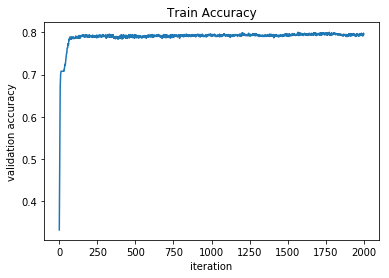

In [18]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

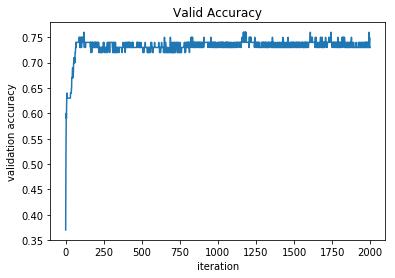

In [19]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test))

Text(0.5,1,'Train Accuracy')

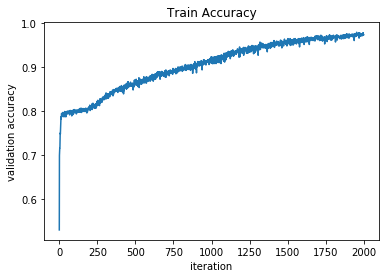

In [21]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

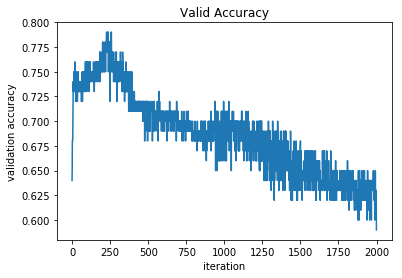

In [22]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [23]:
model = Sequential()
model.add(Dense(60, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

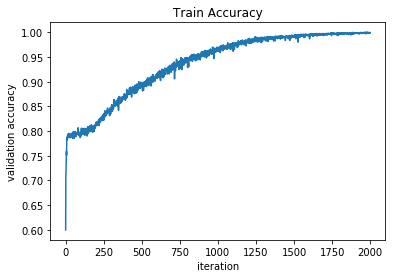

In [24]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

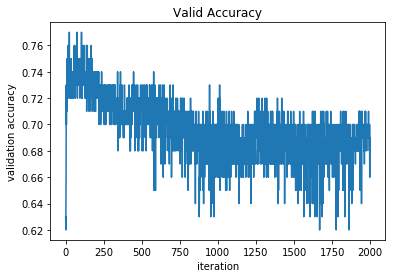

In [25]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [26]:
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

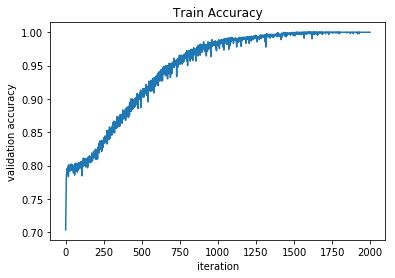

In [27]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

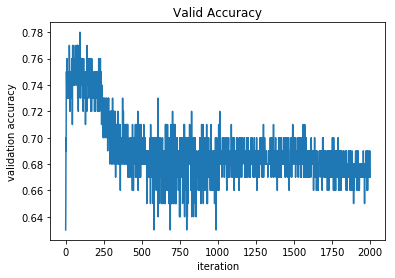

In [28]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [29]:
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

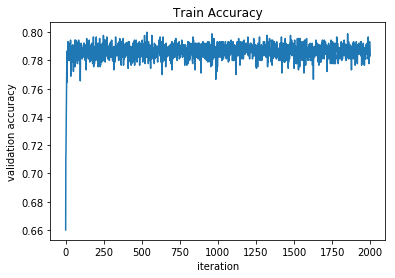

In [30]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

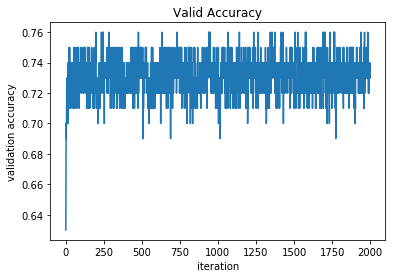

In [31]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [33]:
model = Sequential()
model.add(Dense(120, input_dim=30, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

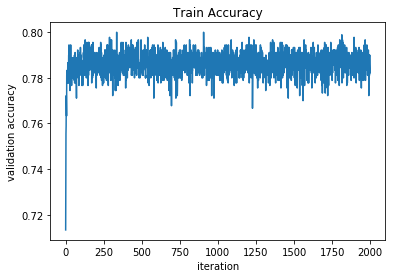

In [34]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

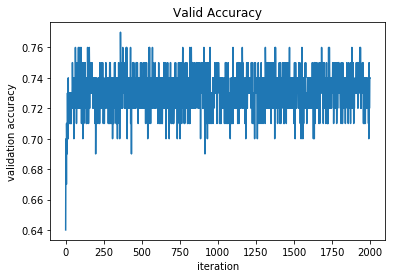

In [35]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [36]:
model = Sequential()
model.add(Dense(150, input_dim=30, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

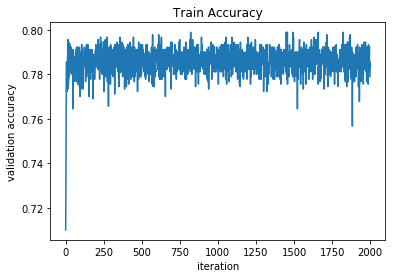

In [37]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

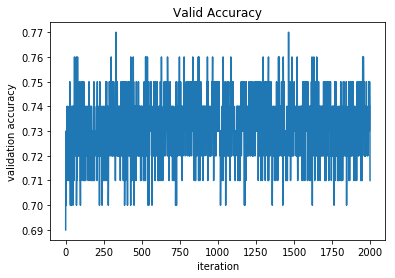

In [38]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [43]:
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

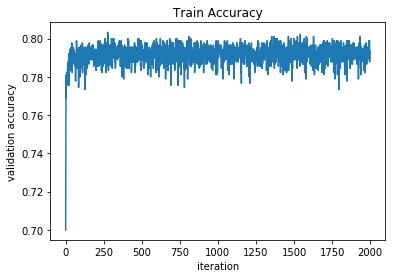

In [44]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

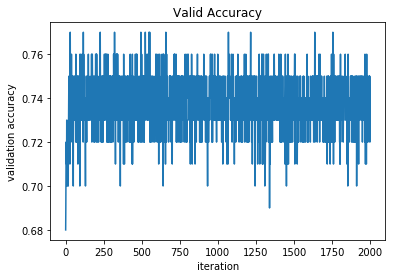

In [45]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [46]:
sgd = SGD(lr=.1)
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
# model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=sgd)
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

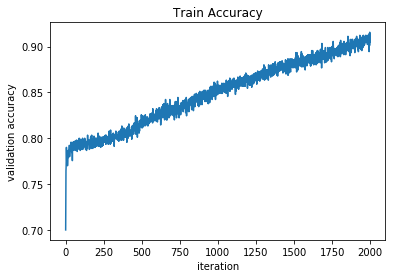

In [47]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

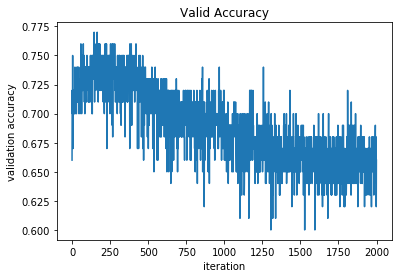

In [48]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [49]:
sgd = SGD(lr=.01)
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
# model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=sgd)
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

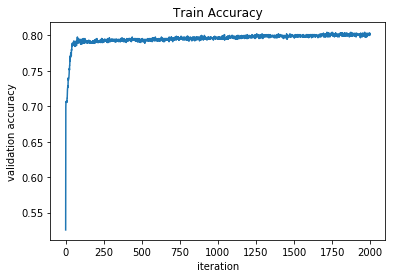

In [50]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

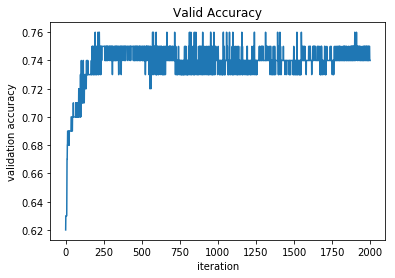

In [51]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [52]:
sgd = SGD(lr=.001)
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
# model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=sgd)
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

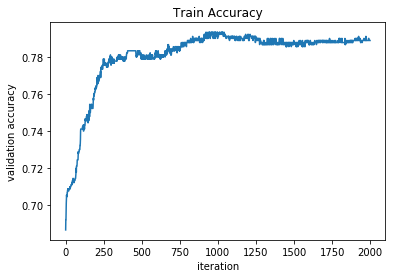

In [53]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

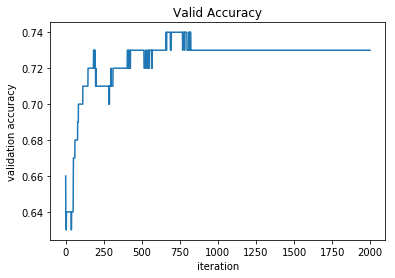

In [54]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [62]:
def step_decay(epoch,lr) :
    return lr* .90

In [63]:
sgd = SGD(lr=.1)
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
# model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=sgd)
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),
                 validation_data=(x_test,y_test),verbose=0,callbacks=[LearningRateScheduler(step_decay)])

Text(0.5,1,'Train Accuracy')

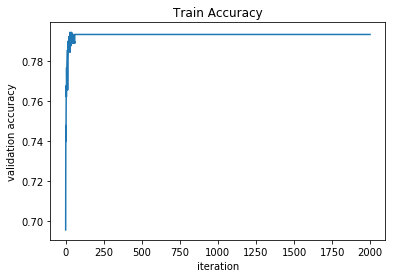

In [64]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

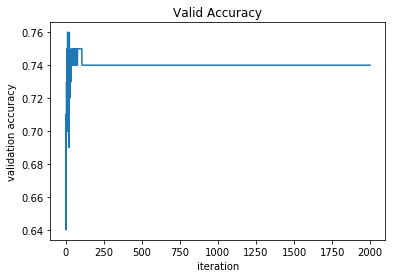

In [61]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [65]:
sgd = SGD(lr=.05)
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
# model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=sgd)
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

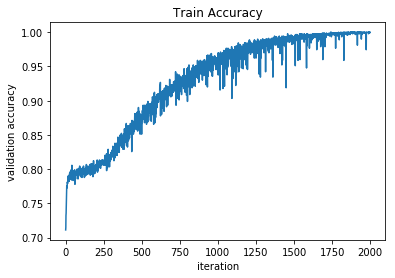

In [66]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

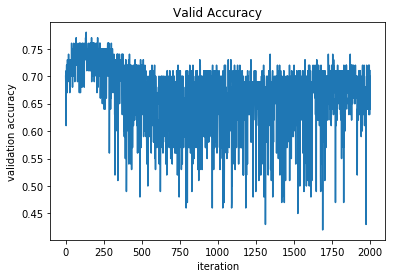

In [67]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [78]:
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
# model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='rmsprop')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

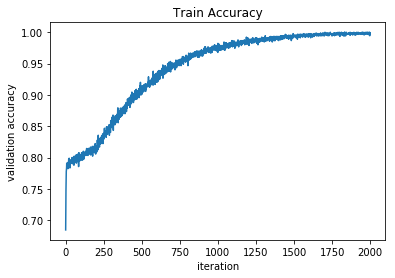

In [79]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

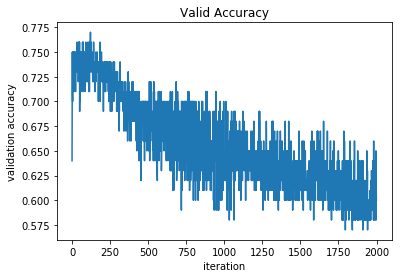

In [80]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [72]:
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
# model.add(Dense(90, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='rmsprop')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

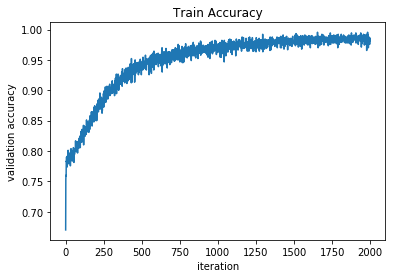

In [73]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

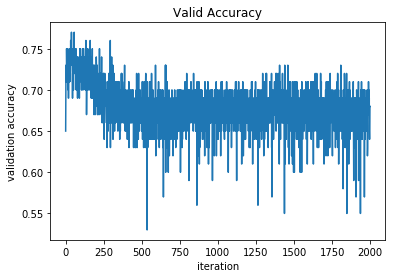

In [74]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [75]:
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dense(90, activation='selu', kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='rmsprop')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

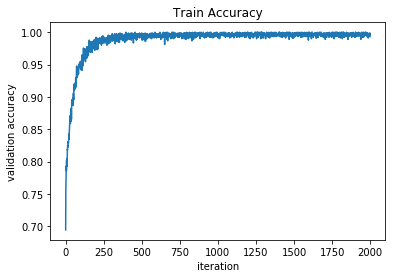

In [76]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

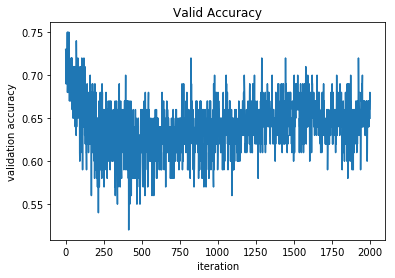

In [77]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [81]:
model = Sequential()
model.add(Dense(90, input_dim=30, activation='selu', kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dense(90, activation='selu', kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='rmsprop')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

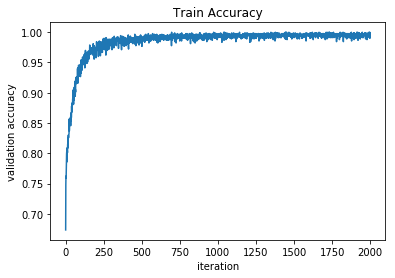

In [82]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

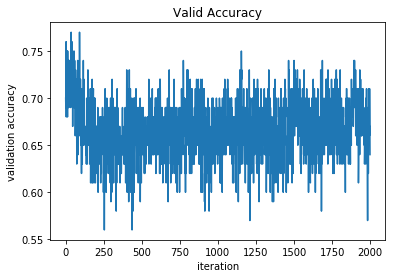

In [83]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [39]:
model = Sequential()
model.add(Dense(200, input_dim=30, activation='selu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test),verbose=0)

Text(0.5,1,'Train Accuracy')

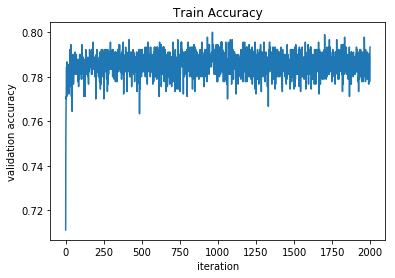

In [40]:
plt.plot(range(len(hist.history['acc'])),hist.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

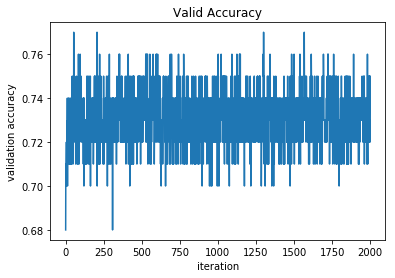

In [41]:
plt.plot(range(len(hist.history['val_acc'])),hist.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')

In [23]:
model = Sequential()
model.add(Dense(100, input_dim=30, activation='selu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(100, activation='selu', kernel_regularizer=regularizers.l1(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(200, activation='selu', kernel_regularizer=regularizers.l1(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(200, activation='selu', kernel_regularizer=regularizers.l1(0.01), kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01), kernel_initializer='glorot_normal'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist2 = model.fit(x_train,y_train,batch_size=32,epochs=int(2000),validation_data=(x_test,y_test))

Train on 900 samples, validate on 100 samples
Epoch 1/2000
900/900 [==============================] - 0s 492us/step - loss: 39.0482 - acc: 0.7022 - val_loss: 31.1594 - val_acc: 0.7800
Epoch 2/2000
900/900 [==============================] - 0s 144us/step - loss: 25.3061 - acc: 0.7444 - val_loss: 19.3284 - val_acc: 0.7100
Epoch 3/2000
900/900 [==============================] - 0s 148us/step - loss: 15.2068 - acc: 0.7311 - val_loss: 11.1288 - val_acc: 0.7100
Epoch 4/2000
900/900 [==============================] - 0s 147us/step - loss: 8.4920 - acc: 0.7022 - val_loss: 5.9893 - val_acc: 0.6900
Epoch 5/2000
900/900 [==============================] - 0s 145us/step - loss: 4.4912 - acc: 0.7011 - val_loss: 3.1399 - val_acc: 0.6900
Epoch 6/2000
900/900 [==============================] - 0s 143us/step - loss: 2.4184 - acc: 0.7011 - val_loss: 1.8084 - val_acc: 0.6900
Epoch 7/2000
900/900 [==============================] - 0s 142us/step - loss: 1.4923 - acc: 0.7011 - val_loss: 1.2358 - val_acc: 0.6

Epoch 120/2000
900/900 [==============================] - 0s 140us/step - loss: 0.6906 - acc: 0.7011 - val_loss: 0.6996 - val_acc: 0.6900
Epoch 121/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6905 - acc: 0.7011 - val_loss: 0.6997 - val_acc: 0.6900
Epoch 122/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6910 - acc: 0.7011 - val_loss: 0.6997 - val_acc: 0.6900
Epoch 123/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6916 - acc: 0.7011 - val_loss: 0.6996 - val_acc: 0.6900
Epoch 124/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6911 - acc: 0.7011 - val_loss: 0.6995 - val_acc: 0.6900
Epoch 125/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6906 - acc: 0.7011 - val_loss: 0.6996 - val_acc: 0.6900
Epoch 126/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6910 - acc: 0.7011 - val_loss: 0.7003 - val_acc: 0.6900
Epoch 127/2000
900/900 [==========

900/900 [==============================] - 0s 123us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 239/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 240/2000
900/900 [==============================] - 0s 153us/step - loss: 0.6887 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 241/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 242/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6891 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 243/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6890 - acc: 0.7011 - val_loss: 0.6986 - val_acc: 0.6900
Epoch 244/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6889 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 245/2000
900/900 [=========================

900/900 [==============================] - 0s 124us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 357/2000
900/900 [==============================] - 0s 154us/step - loss: 0.6887 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 358/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6984 - val_acc: 0.6900
Epoch 359/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6983 - val_acc: 0.6900
Epoch 360/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 361/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6888 - acc: 0.7011 - val_loss: 0.6983 - val_acc: 0.6900
Epoch 362/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6887 - acc: 0.7011 - val_loss: 0.6982 - val_acc: 0.6900
Epoch 363/2000
900/900 [=========================

900/900 [==============================] - 0s 121us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6985 - val_acc: 0.6900
Epoch 475/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 476/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 477/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 478/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6982 - val_acc: 0.6900
Epoch 479/2000
900/900 [==============================] - 0s 153us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6983 - val_acc: 0.6900
Epoch 480/2000
900/900 [==============================] - 0s 141us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6982 - val_acc: 0.6900
Epoch 481/2000
900/900 [=========================

900/900 [==============================] - 0s 121us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 593/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 594/2000
900/900 [==============================] - 0s 152us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 595/2000
900/900 [==============================] - 0s 153us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 596/2000
900/900 [==============================] - 0s 141us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 597/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 598/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 599/2000
900/900 [=========================

900/900 [==============================] - 0s 126us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6983 - val_acc: 0.6900
Epoch 711/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 712/2000
900/900 [==============================] - 0s 157us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 713/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 714/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6985 - val_acc: 0.6900
Epoch 715/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 716/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 717/2000
900/900 [=========================

900/900 [==============================] - 0s 128us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 829/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 830/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 831/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 832/2000
900/900 [==============================] - 0s 152us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 833/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 834/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6886 - acc: 0.7011 - val_loss: 0.6984 - val_acc: 0.6900
Epoch 835/2000
900/900 [=========================

900/900 [==============================] - 0s 129us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 947/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6982 - val_acc: 0.6900
Epoch 948/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 949/2000
900/900 [==============================] - 0s 155us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 950/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 951/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 952/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 953/2000
900/900 [=========================

900/900 [==============================] - 0s 122us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1065/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1066/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1067/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1068/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1069/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1070/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1071/2000
900/900 [==================

900/900 [==============================] - 0s 121us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1124/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1125/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1126/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1127/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 1128/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1129/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1130/2000
900/900 [==================

900/900 [==============================] - 0s 122us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1183/2000
900/900 [==============================] - 0s 152us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1184/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1185/2000
900/900 [==============================] - 0s 157us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1186/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1187/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1188/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1189/2000
900/900 [==================

900/900 [==============================] - 0s 123us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1242/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1243/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1244/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1245/2000
900/900 [==============================] - 0s 157us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1246/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1247/2000
900/900 [==============================] - 0s 153us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1248/2000
900/900 [==================

900/900 [==============================] - 0s 126us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1301/2000
900/900 [==============================] - 0s 141us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1302/2000
900/900 [==============================] - 0s 154us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 1303/2000
900/900 [==============================] - 0s 157us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 1304/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6983 - val_acc: 0.6900
Epoch 1305/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1306/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1307/2000
900/900 [==================

900/900 [==============================] - 0s 123us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 1360/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 1361/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6888 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 1362/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 1363/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6884 - acc: 0.7011 - val_loss: 0.6981 - val_acc: 0.6900
Epoch 1364/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6885 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1365/2000
900/900 [==============================] - 0s 157us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1366/2000
900/900 [==================

900/900 [==============================] - 0s 122us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1419/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1420/2000
900/900 [==============================] - 0s 136us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6971 - val_acc: 0.6900
Epoch 1421/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1422/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1423/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1424/2000
900/900 [==============================] - 0s 159us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1425/2000
900/900 [==================

900/900 [==============================] - 0s 126us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1478/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1479/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6980 - val_acc: 0.6900
Epoch 1480/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1481/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1482/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1483/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1484/2000
900/900 [==================

900/900 [==============================] - 0s 127us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1537/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1538/2000
900/900 [==============================] - 0s 139us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1539/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6882 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1540/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1541/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1542/2000
900/900 [==============================] - 0s 140us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1543/2000
900/900 [==================

900/900 [==============================] - 0s 123us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1596/2000
900/900 [==============================] - 0s 152us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1597/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6971 - val_acc: 0.6900
Epoch 1598/2000
900/900 [==============================] - 0s 154us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1599/2000
900/900 [==============================] - 0s 145us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1600/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1601/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1602/2000
900/900 [==================

900/900 [==============================] - 0s 125us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1655/2000
900/900 [==============================] - 0s 146us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1656/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1657/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1658/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1659/2000
900/900 [==============================] - 0s 138us/step - loss: 0.6883 - acc: 0.7011 - val_loss: 0.6978 - val_acc: 0.6900
Epoch 1660/2000
900/900 [==============================] - 0s 141us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1661/2000
900/900 [==================

900/900 [==============================] - 0s 120us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1714/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1715/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1716/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1717/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1718/2000
900/900 [==============================] - 0s 138us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1719/2000
900/900 [==============================] - 0s 126us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6979 - val_acc: 0.6900
Epoch 1720/2000
900/900 [==================

900/900 [==============================] - 0s 128us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1773/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1774/2000
900/900 [==============================] - 0s 153us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1775/2000
900/900 [==============================] - 0s 153us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1776/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1777/2000
900/900 [==============================] - 0s 141us/step - loss: 0.6881 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1778/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1779/2000
900/900 [==================

900/900 [==============================] - 0s 124us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1832/2000
900/900 [==============================] - 0s 148us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1833/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1834/2000
900/900 [==============================] - 0s 143us/step - loss: 0.6878 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1835/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6878 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1836/2000
900/900 [==============================] - 0s 150us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1837/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1838/2000
900/900 [==================

900/900 [==============================] - 0s 118us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1891/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6878 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1892/2000
900/900 [==============================] - 0s 141us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1893/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6975 - val_acc: 0.6900
Epoch 1894/2000
900/900 [==============================] - 0s 151us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6976 - val_acc: 0.6900
Epoch 1895/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1896/2000
900/900 [==============================] - 0s 137us/step - loss: 0.6880 - acc: 0.7011 - val_loss: 0.6972 - val_acc: 0.6900
Epoch 1897/2000
900/900 [==================

900/900 [==============================] - 0s 126us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6970 - val_acc: 0.6900
Epoch 1950/2000
900/900 [==============================] - 0s 147us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1951/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6974 - val_acc: 0.6900
Epoch 1952/2000
900/900 [==============================] - 0s 149us/step - loss: 0.6878 - acc: 0.7011 - val_loss: 0.6970 - val_acc: 0.6900
Epoch 1953/2000
900/900 [==============================] - 0s 144us/step - loss: 0.6878 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1954/2000
900/900 [==============================] - 0s 153us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6977 - val_acc: 0.6900
Epoch 1955/2000
900/900 [==============================] - 0s 156us/step - loss: 0.6879 - acc: 0.7011 - val_loss: 0.6973 - val_acc: 0.6900
Epoch 1956/2000
900/900 [==================

Text(0.5,1,'Train Accuracy')

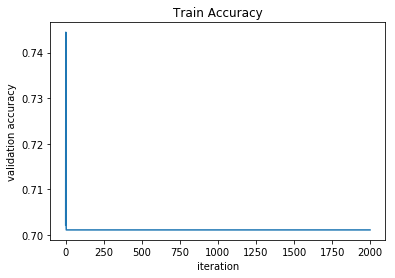

In [30]:
plt.plot(range(len(hist2.history['acc'])),hist2.history['acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Train Accuracy')

Text(0.5,1,'Valid Accuracy')

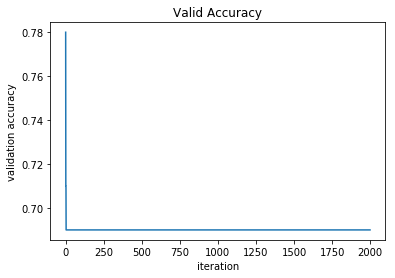

In [31]:
plt.plot(range(len(hist2.history['val_acc'])),hist2.history['val_acc'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Valid Accuracy')